## Final Project Submission

Please fill out:
* Student name:  GROUP 9
* Student pace:  part time 
* Scheduled project review date/time: 
* Instructor name: William Okomba
* Blog post URL:


## Project Overview

XYZ real estate agency, nestled in the heart of a vibrant northwestern county, serves as the gateway to turning homeownership dreams into reality. With unwavering commitment to excellence and data-driven strategies, the agency seeks to be a pioneering force in optimal pricing and successful real estate journeys. It's ultimate goal being to transcend conventional boundaries by harnessing the power of technology and analytical insights to reimagine real estate as we know it.


## Business Problem

 XYZ real estate agency need help determining the key factors that influence house prices in the area and use this information to guide the agency's pricing of houses. The goal of this project is therefore to develop the best model that will help the agency determine the best housing prices and ultimately increasing their annual sales.




## Project Objectives

- To identify key features that significantly influence house prices in the northwestern county.
- To develop an optimal pricing strategy using a robust multiple linear regression model.
- To identify overpriced or underpriced houses by comparing predicted and actual prices of the houses.
- To help improve the agency's annual revenue by leveraging the analytical insights and pricing strategy developed through this project.


#### About the  Dataset

This dataset contains house sale prices for King County,USA which includes Seattle. It includes homes sold between May 2014 and May 2015.


#### Data description report
- The dataset contains 21 columns and 21,597 rows. This means there are 21 different variables each with 21,597 records.
- The dataset consists of three main data types; float, integer and object.
- Three columns have missing values:
    - The waterfront column has 2376 missing values, which is about 11% of the data.
    - The view column has 63 missing values, which is about 0.3% of the data.
    - The yr_renovated column has 3842 missing values, which is about 18% of the data.   
- There are no duplicated rows in this dataset.
- Finally, we used a histograms to help visualize the distribution of our numerical data and provide insights into its shape, central tendency, and spread.

#### Getting Started...

In [1]:
#Importing the relevant libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler
from statsmodels.formula.api import ols
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats
%matplotlib inline
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the data and viewing a random sample of 5 rows
df = pd.read_csv('data/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8024,2126049096,12/2/2014,399000.0,3,1.00,1460,8290,1.0,NO,NONE,...,8 Good,1460,0.0,1959,0.0,98125,47.7246,-122.300,1470,8290
20589,7338220370,10/6/2014,297000.0,4,2.50,2230,4952,2.0,NO,NONE,...,8 Good,2230,0.0,2011,0.0,98002,47.3363,-122.211,2030,3721
14306,2488200455,7/3/2014,405500.0,2,2.75,1350,1252,2.0,NO,NONE,...,8 Good,1120,230.0,2006,0.0,98136,47.5220,-122.390,1410,1265
21419,1438000360,6/3/2014,494995.0,5,2.75,2670,3800,2.0,NO,NONE,...,8 Good,2670,0.0,2014,0.0,98059,47.4783,-122.123,2670,3800
16241,8731800840,6/19/2014,265000.0,3,1.75,1840,7300,1.0,NO,NONE,...,8 Good,1840,0.0,1966,0.0,98023,47.3122,-122.369,1920,8010
863,1937300270,3/3/2015,910000.0,3,3.50,2480,3200,2.0,NaN,NONE,...,10 Very Good,2480,0.0,2010,0.0,98144,47.5951,-122.307,1980,3200
3730,1828300100,3/30/2015,800000.0,4,2.50,3100,7807,2.0,NO,NONE,...,9 Better,3100,0.0,2003,0.0,98034,47.7151,-122.227,3100,7807
12089,8165501620,12/18/2014,348500.0,2,2.25,1550,1824,2.0,NaN,NONE,...,8 Good,1550,0.0,2007,0.0,98106,47.5396,-122.368,1460,1826
16872,7922900250,5/20/2014,507500.0,3,2.00,2020,8118,1.0,NO,NONE,...,7 Average,1020,1000.0,1963,0.0,98008,47.5866,-122.118,1670,8118
2893,423059184,12/1/2014,180000.0,3,1.00,1960,9583,2.0,NO,NONE,...,5 Fair,1960,0.0,1908,0.0,98056,47.5050,-122.171,1850,8324


In [3]:
#Viewing the last 5 rows
df.tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21587,7852140040,8/25/2014,507250.0,3,2.50,2270,5536,2.0,NaN,NONE,...,8 Good,2270,0.0,2003,0.0,98065,47.5389,-121.881,2270,5731
21588,9834201367,1/26/2015,429000.0,3,2.00,1490,1126,3.0,NO,NONE,...,8 Good,1490,0.0,2014,0.0,98144,47.5699,-122.288,1400,1230
21589,3448900210,10/14/2014,610685.0,4,2.50,2520,6023,2.0,NO,NaN,...,9 Better,2520,0.0,2014,0.0,98056,47.5137,-122.167,2520,6023
21590,7936000429,3/26/2015,1010000.0,4,3.50,3510,7200,2.0,NO,NONE,...,9 Better,2600,910.0,2009,0.0,98136,47.5537,-122.398,2050,6200
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,NO,NONE,...,8 Good,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


####  Data  Understanding

Exploring the data to get a glimpse of:
- Shape of the data
- The column names
- The data types
- Statistical summary of the data
- The null values
- The duplicates

In [4]:
# An overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
# Shape of the data
df.shape

(21597, 21)

In [6]:
# A view of the columns
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
# A statistical summary of the data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
#Checking for missing values in our data set
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
# Calculating the percentage of missing values in each column
missing_percentage = (df.isna().sum() / len(df)) * 100
print(missing_percentage)

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64


In [10]:
# Checking for duplicates
df.duplicated().sum()

0

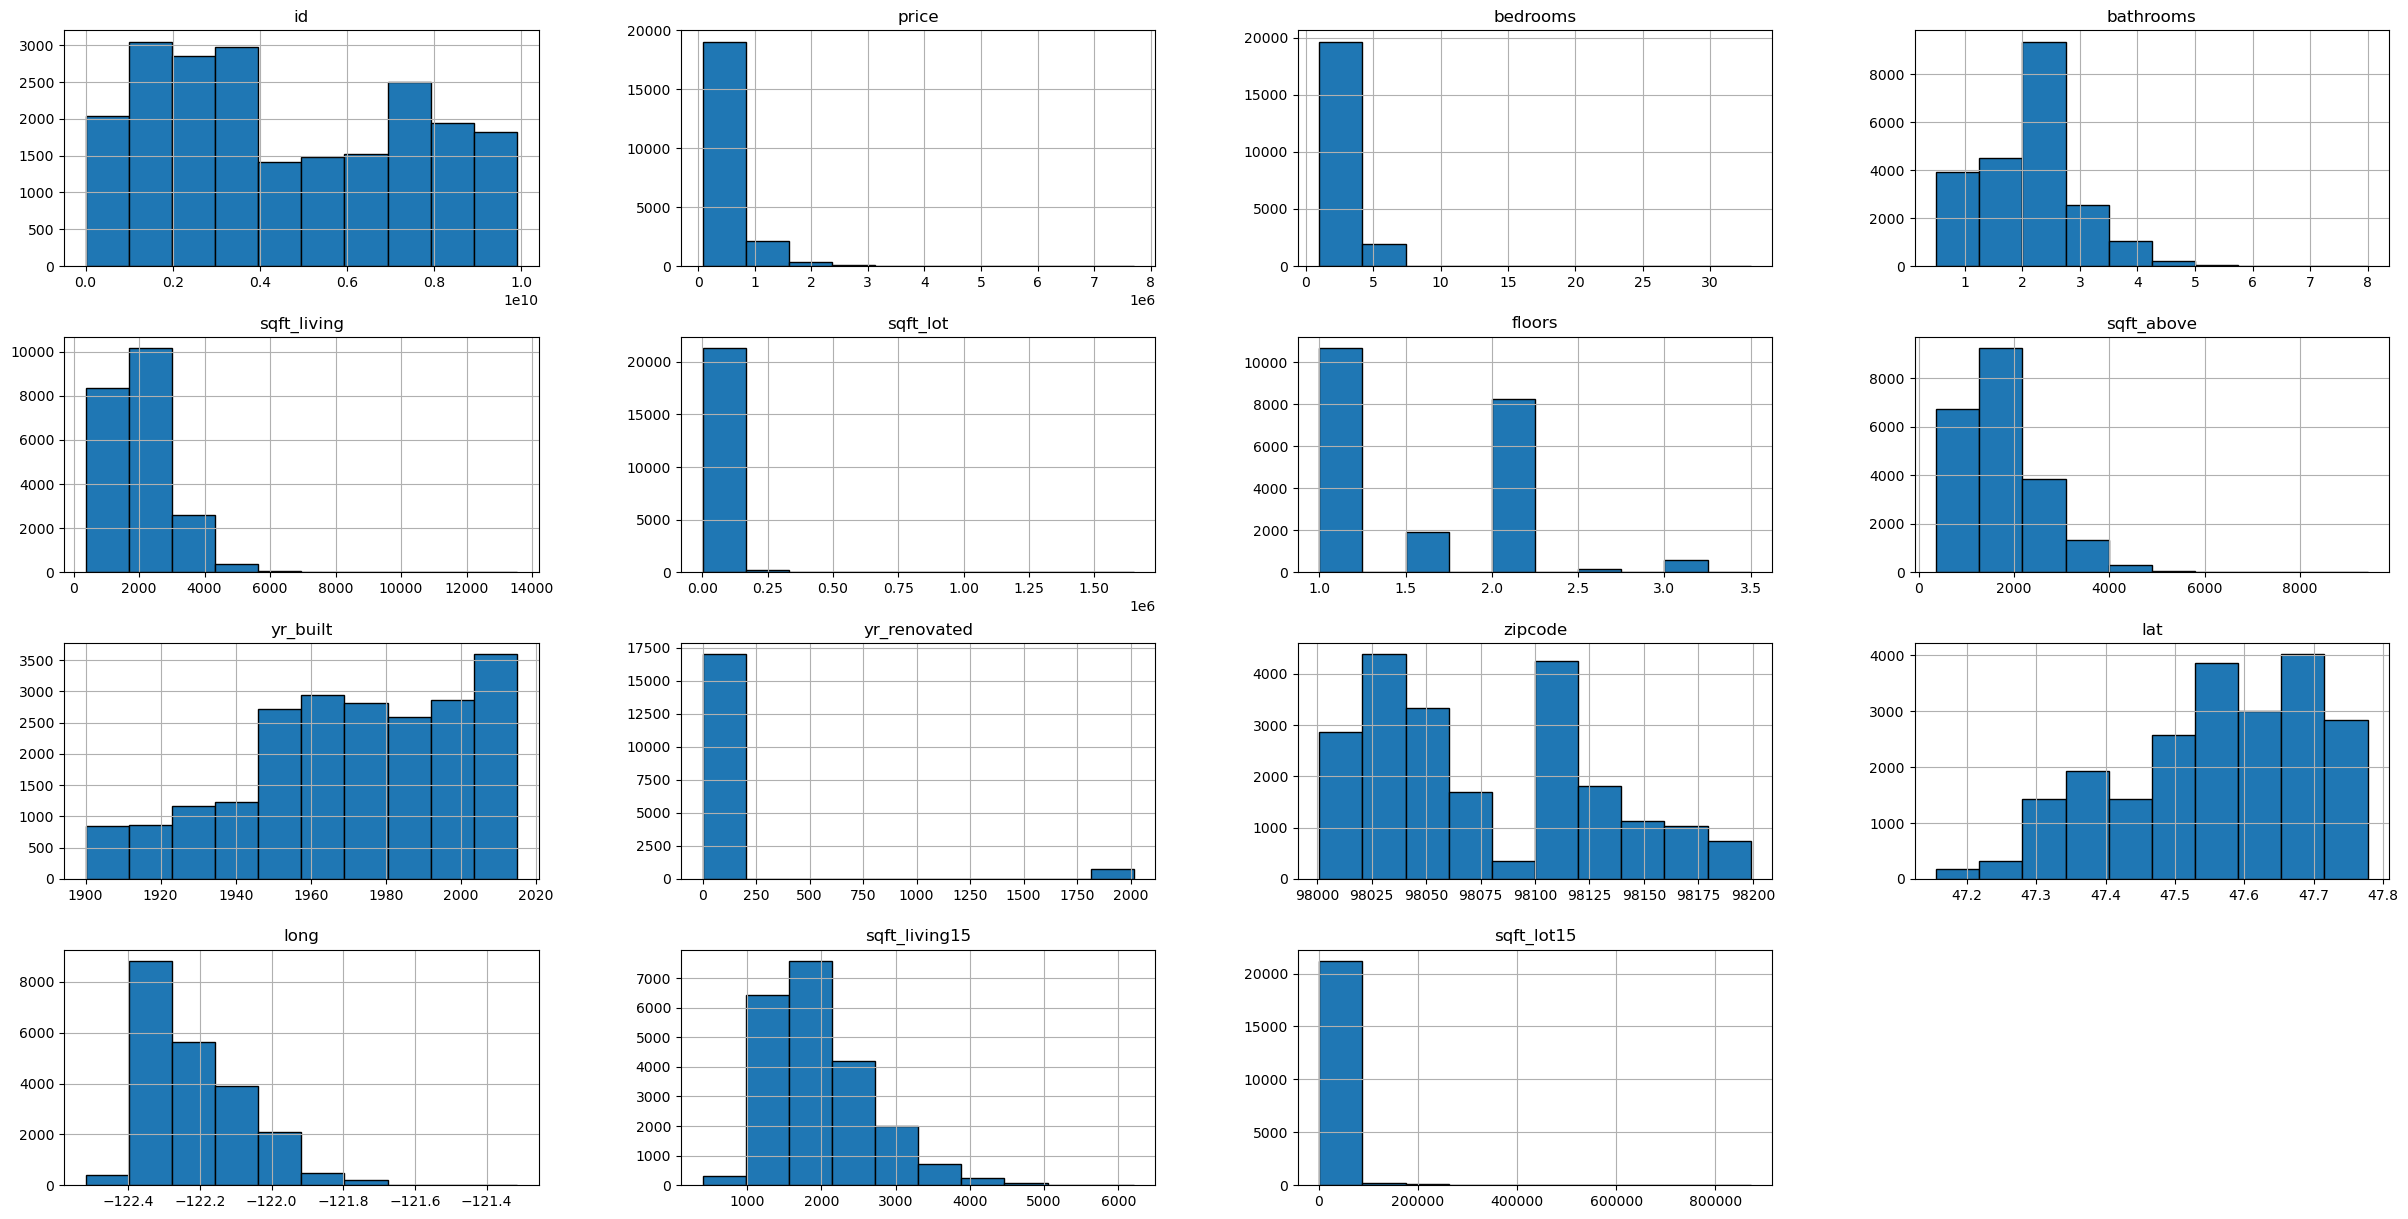

In [11]:
# PLOT DATA HISTOGRAM to get an overview of the distribution
df.hist(figsize=(30,15), edgecolor = 'black');

## Data Cleaning

- Dropping missing values. All 3 columns with missing values had null values below 20% and so we decided to drop the rows with missing values as this would not have a large effect on the dataset.
- Converting data types: 
    - Converted the  'grade' column from object type to integer by splitting and creating a new column 'numerical_grade'.
    - Converted the 'waterfront' column from object type to integer.
    - Converted the 'date' column from object type to integer by defining a lambda function and then created a new column 'year' using  pd.DatetimeIndex function with only the year component from the 'date' column
- Finally, created a subset of the main dataset consisting of features to use during the analysis.

In [12]:
#Dropping the missing values in waterfront, yr_renovated and view columns
df.dropna(subset = ["waterfront"], inplace = True)
df.dropna(subset = ["yr_renovated"], inplace = True)
df.dropna(subset = ["view"], inplace = True)

In [13]:
# Rechecking for missing values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [14]:
# Reindexing after dropping and removing the missing values
df.reset_index(drop=True, inplace=True)
#Checking for the columns of the dataframe
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [15]:
#Spliting grade and creating a new column 'rating' so that we can see its numeric correlation with price
df[["numerical_grade", "rating"]] = df["grade"].str.split(n=1, expand=True)
df["numerical_grade"] = df["numerical_grade"].astype(int)
df.drop('grade', axis=1, inplace=True)

In [16]:
# Checking correlation against price to determine the features to use in our analysis
df.corr()['price']

id                -0.015183
price              1.000000
bedrooms           0.305489
bathrooms          0.526155
sqft_living        0.706189
sqft_lot           0.084504
floors             0.259505
sqft_above         0.612014
yr_built           0.049345
yr_renovated       0.122731
zipcode           -0.049502
lat                0.306607
long               0.021215
sqft_living15      0.581572
sqft_lot15         0.079402
numerical_grade    0.664146
Name: price, dtype: float64

In [17]:
# A copy of the data frame with the features that we are working with
df_subset = df[[ 'price', 'bedrooms', 'bathrooms', 'sqft_living',  'waterfront','sqft_above','sqft_living15','numerical_grade', 'rating',"floors",'zipcode','date']].copy()
df_subset

,price,bedrooms,bathrooms,sqft_living,waterfront,sqft_above,sqft_living15,numerical_grade,rating,floors,zipcode,date
0,538000.0,3,2.25,2570,NO,2170,1690,7,Average,2.0,98125,12/9/2014
1,604000.0,4,3.00,1960,NO,1050,1360,7,Average,1.0,98136,12/9/2014
2,510000.0,3,2.00,1680,NO,1680,1800,8,Good,1.0,98074,2/18/2015
3,1230000.0,4,4.50,5420,NO,3890,4760,11,Excellent,1.0,98053,5/12/2014
4,257500.0,3,2.25,1715,NO,1715,2238,7,Average,2.0,98003,6/27/2014
...,...,...,...,...,...,...,...,...,...,...,...,...
15757,475000.0,3,2.50,1310,NO,1180,1330,8,Good,2.0,98116,2/19/2015
15758,360000.0,3,2.50,1530,NO,1530,1530,8,Good,3.0,98103,5/21/2014
15759,400000.0,4,2.50,2310,NO,2310,1830,8,Good,2.0,98146,2/23/2015
15760,402101.0,2,0.75,1020,NO,1020,1020,7,Average,2.0,98144,6/23/2014


In [18]:
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)
df_subset['year'] = pd.DatetimeIndex(df_subset['date']).year
df_subset.drop("date",axis = 1,inplace =True)

In [19]:
#convert waterfront to numerical values
df_subset["waterfront"] = df_subset["waterfront"].map({'NO': 0, 'YES': 1})
df_subset

,price,bedrooms,bathrooms,sqft_living,waterfront,sqft_above,sqft_living15,numerical_grade,rating,floors,zipcode,year
0,538000,3,2.25,2570,0,2170,1690,7,Average,2,98125,2014
1,604000,4,3,1960,0,1050,1360,7,Average,1,98136,2014
2,510000,3,2,1680,0,1680,1800,8,Good,1,98074,2015
3,1230000,4,4.50,5420,0,3890,4760,11,Excellent,1,98053,2014
4,257500,3,2.25,1715,0,1715,2238,7,Average,2,98003,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
15757,475000,3,2.50,1310,0,1180,1330,8,Good,2,98116,2015
15758,360000,3,2.50,1530,0,1530,1530,8,Good,3,98103,2014
15759,400000,4,2.50,2310,0,2310,1830,8,Good,2,98146,2015
15760,402101,2,0.75,1020,0,1020,1020,7,Average,2,98144,2014


In [20]:
df_subset.corr()['price']

price                 1
bedrooms           0.31
bathrooms          0.53
sqft_living        0.71
waterfront         0.27
sqft_above         0.61
sqft_living15      0.58
numerical_grade    0.66
floors             0.26
zipcode           -0.05
year               0.00
Name: price, dtype: float64

## Exploratory Data Analysis

###  Univariate Analysis

- **Numerical Variables**

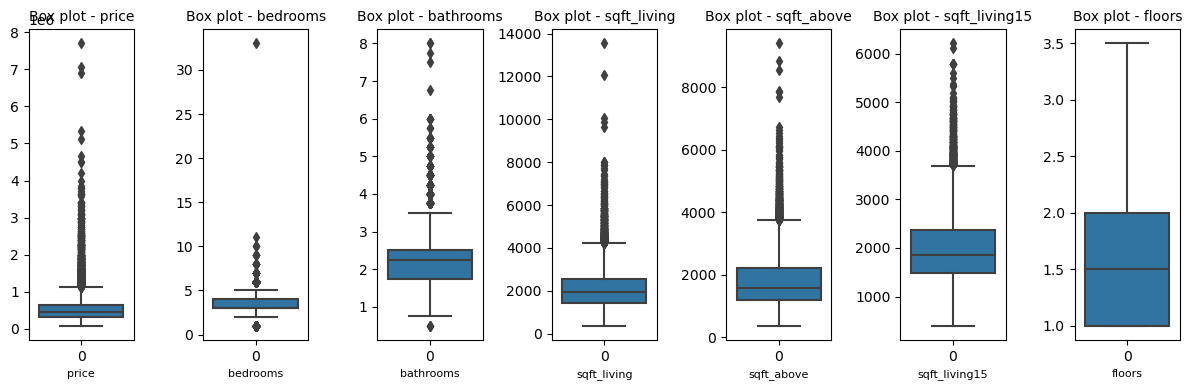

In [21]:
#Plotting box plots to check wether we have outliers in the data set
#Columns for our box plots
columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_living15','floors']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(12, 4))

# Generate box plots for each column
for i, column in enumerate(columns):
    sns.boxplot(data=df_subset[column], ax=axes[i])
    axes[i].set_title(f'Box plot - {column}', fontsize=10)
    axes[i].set_xlabel(column, fontsize=8)

# Adjust the layout and spacing
plt.tight_layout()

# Display the plots
plt.show()


In [22]:
# Statistical view to confirm the outliers plotted above
#df.describe()
min_max_summary = df_subset.agg(['min', 'max'])
min_max_summary

,price,bedrooms,bathrooms,sqft_living,waterfront,sqft_above,sqft_living15,numerical_grade,rating,floors,zipcode,year
min,82000,1,0.50,370,0,370,399,3,Average,1,98001,2014
max,7700000,33,8,13540,1,9410,6210,13,Very Good,3.50,98199,2015


In [23]:
# Defining function to remove outliers from the subset
def remove_outliers(df_subset):
    '''removes entries with z-score above 3 for specific columns'''
    variables = ['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_living15','floors','numerical_grade']
    
    for variable in variables:
        df_subset= df_subset[np.abs(df_subset[variable]-df_subset[variable].mean()) <= (3*df_subset[variable].std())]
        
    return df_subset
#Removing the outliers which have a standard deviation greater than 3
df_subset = remove_outliers(df_subset)

In [24]:
# Statistical view to recheck for outliers after cleaning
#df_subset.describe()
min_max_summary = df_subset.agg(['min', 'max'])
min_max_summary

,price,bedrooms,bathrooms,sqft_living,waterfront,sqft_above,sqft_living15,numerical_grade,rating,floors,zipcode,year
min,82000,1,0.50,370,0,370,399,5,Average,1,98001,2014
max,1650000,6,4.25,4450,1,3890,3760,10,Very Good,3,98199,2015


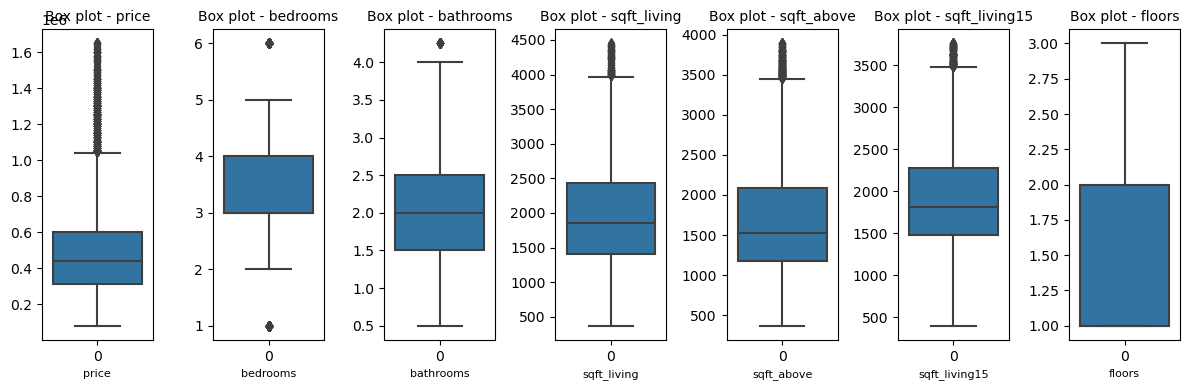

In [25]:
# Plotting to recheck for outliers in the dataset after cleaning
# Define the columns for box plots
columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_living15','floors']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(12, 4))

# Generate box plots for each column
for i, column in enumerate(columns):
    sns.boxplot(data= df_subset[column], ax=axes[i])
    axes[i].set_title(f'Box plot - {column}', fontsize=10)
    axes[i].set_xlabel(column, fontsize=8)

# Adjust the layout and spacing
plt.tight_layout()

# Display the plots
plt.show()

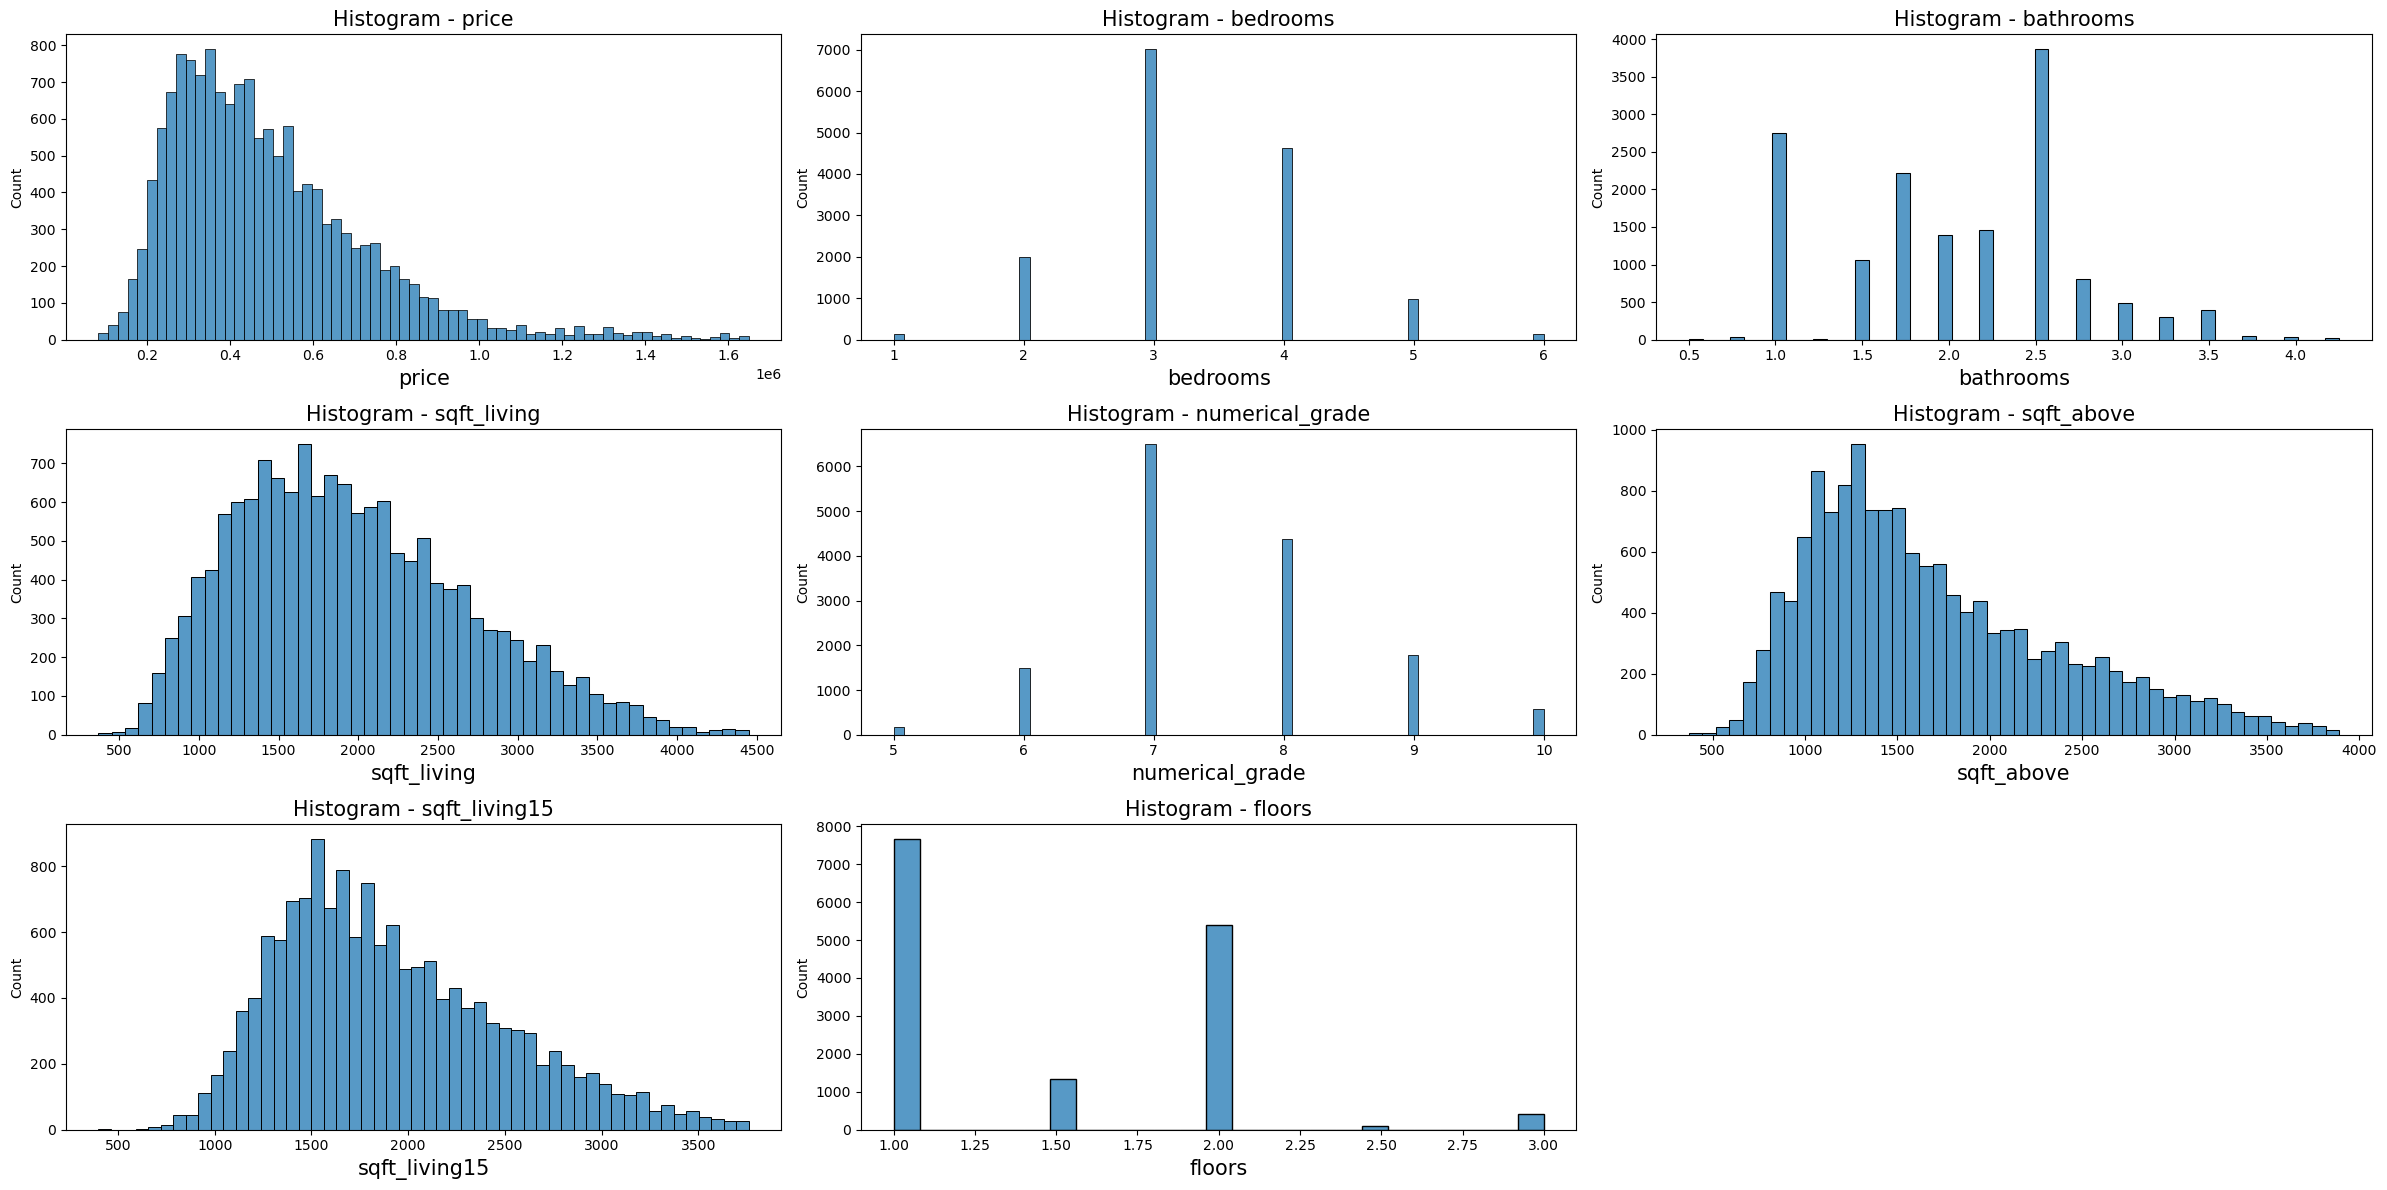

In [26]:
# Plotting histograms to check for the frequencies of the dataset after cleaning
# Define the columns for histograms
columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living','numerical_grade', 'sqft_above', 'sqft_living15','floors']

# Calculate the number of rows and columns for the subplot grid
n_cols = 3
n_rows = (len(columns) - 1) // n_cols + 1

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(24, 4*n_rows))

# Flatten the axes array
axes = axes.flatten()

# Generate histograms for each column
for i, column in enumerate(columns):
    sns.histplot(data=df_subset[column], ax=axes[i])
    axes[i].set_title(f'Histogram - {column}', fontsize=15)
    axes[i].set_xlabel(column, fontsize=15)

# Remove any unused subplots
for j in range(len(columns), n_rows * n_cols):
    fig.delaxes(axes[j])

# Adjust the layout and spacing
plt.tight_layout()

# Display the plots
plt.show()

In [27]:
#A statistical view of skewness
df_subset.skew()

price              1.39
bedrooms           0.27
bathrooms          0.01
sqft_living        0.55
waterfront        14.93
sqft_above         0.86
sqft_living15      0.67
numerical_grade    0.41
floors             0.68
zipcode            0.39
year               0.76
dtype: float64

- **Categorical Variables**

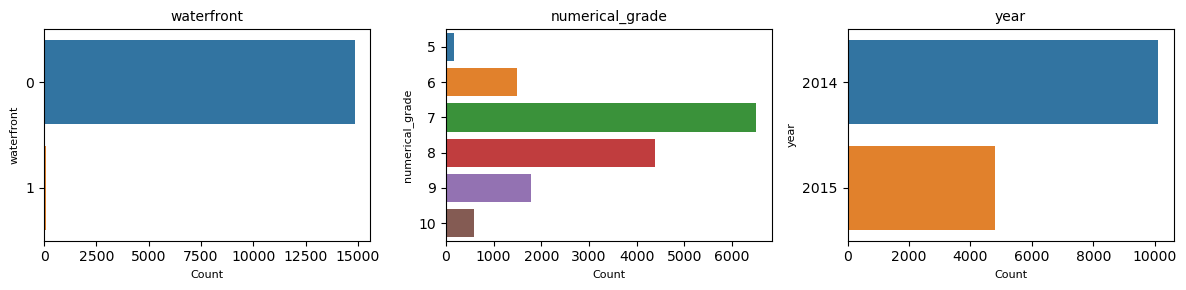

In [28]:
# Define the columns
columns = ['waterfront','numerical_grade','year']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(12, 3))

# Perform univariate analysis for each column
for i, column in enumerate(columns):
    counts = df_subset[column].value_counts().sort_values(ascending=False)
    sns.barplot(x=counts, y=counts.index, ax=axes[i], orient='h')
    axes[i].set_title(f'{column}', fontsize=10)
    axes[i].set_xlabel('Count', fontsize=8)
    axes[i].set_ylabel(column, fontsize=8)

# Adjust the layout and spacing
plt.tight_layout()

# Display the plots
plt.show()

- **For our univariate analysis**, first we **plotted box plots to check for outliers** in our features in which we found all our features to have extreme values that could potentially violate the normalcy distribution of our data and result in an inaccurate predictive model. We therefore decided to remove these outliers.

- We also **plotted histograms to provide insights into the frequency distribution of our features** and to  provide some visual indications of skewness in our data. While this is not the precise measure of skewness, we notice that squarefoot living has a somewhat normal distribution while price, sqft_above, sqft_living15 are positively skewed.

- **For the categorical variables**, we plotted bar plots to get a sense of the distribution of our categorical data. The bar plot suggest majority of houses have no waterfronts with only a few houses having waterfronts. It will be interesting to see what impact this has on pricing further into our analysis.

- The numerical_grade bar plot indicates majority of the houses are grade 7 which is average rating while very few are above 10. We will also look at how grading potentially affects house pricing.
- With the year variable we also noticed that more houses were sold in 2014 compared to 2015






### Bivariate Analysis

- **Numerical Variables**

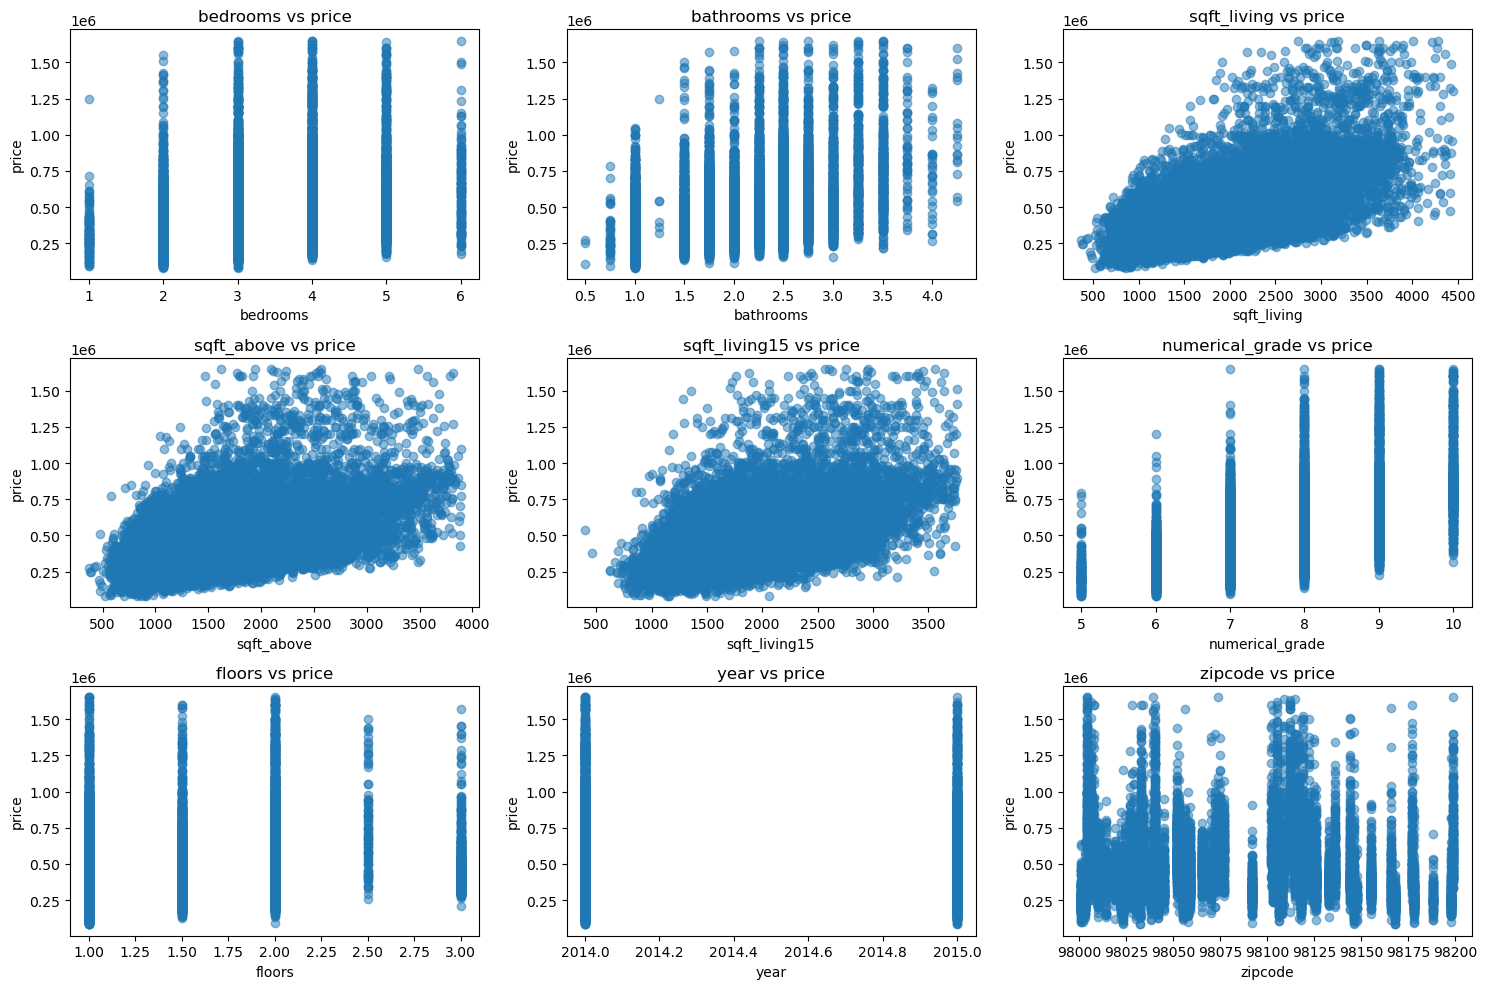

In [29]:
#for numeric values
# Select the desired features and the target variable
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_living15','numerical_grade','floors','year','zipcode']
target = 'price'

# Calculate the number of rows and columns for the subplot grid
n_rows = 3
n_cols = 3

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Flatten the axes array
axes = axes.flatten()

# Plotting bivariate relationships
for i, feature in enumerate(features):
    axes[i].scatter(df_subset[feature], df_subset[target], alpha=0.5)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target)
    axes[i].set_title(f'{feature} vs {target}')

# Remove any unused subplots
if len(features) < n_rows * n_cols:
    for j in range(len(features), n_rows * n_cols):
        fig.delaxes(axes[j])

# Adjust the layout and spacing
plt.tight_layout()

# Display the plots
plt.show()


- **Categorical variables**

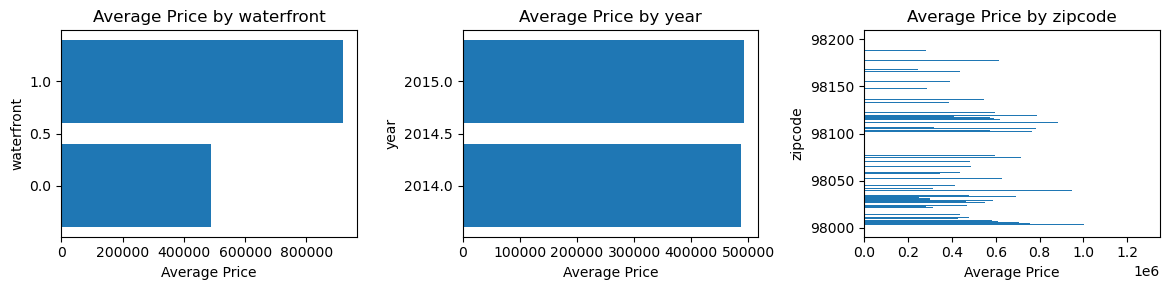

In [30]:
#categorical values against price
# Define the columns
columns = ['waterfront','year','zipcode']

# Create bar plots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(12, 3))

# Generate bar plots for each column
for i, column in enumerate(columns):
    grouped_data = df_subset.groupby(column)['price'].mean().sort_values(ascending=False)
    axes[i].barh(grouped_data.index, grouped_data.values)
    axes[i].set_xlabel('Average Price')
    axes[i].set_ylabel(column)
    axes[i].set_title(f'Average Price by {column}')

# Adjust the layout and spacing
plt.tight_layout()

# Display the plots
plt.show()

* For our **Bivariate analyisis** we plotted scatter plots and bar plots for our numerical and categorical variables.
* The scatter plots were a representation of the relationship between the **numerical values**(bedrooms,bathrooms,sqft_living,sqft_above, sqft_living15,numerical_grade,floors,year,zipcode) and the **price**. According to our plots the numerical variables each have a unique effect on the house pricing.
* The bar plots represent the relationship between our **categorical variables**(waterfront, year built and zipcode) and the **price**. These plots show how the categorical values individually affect the prices of houses


#### Multivariate Analysis

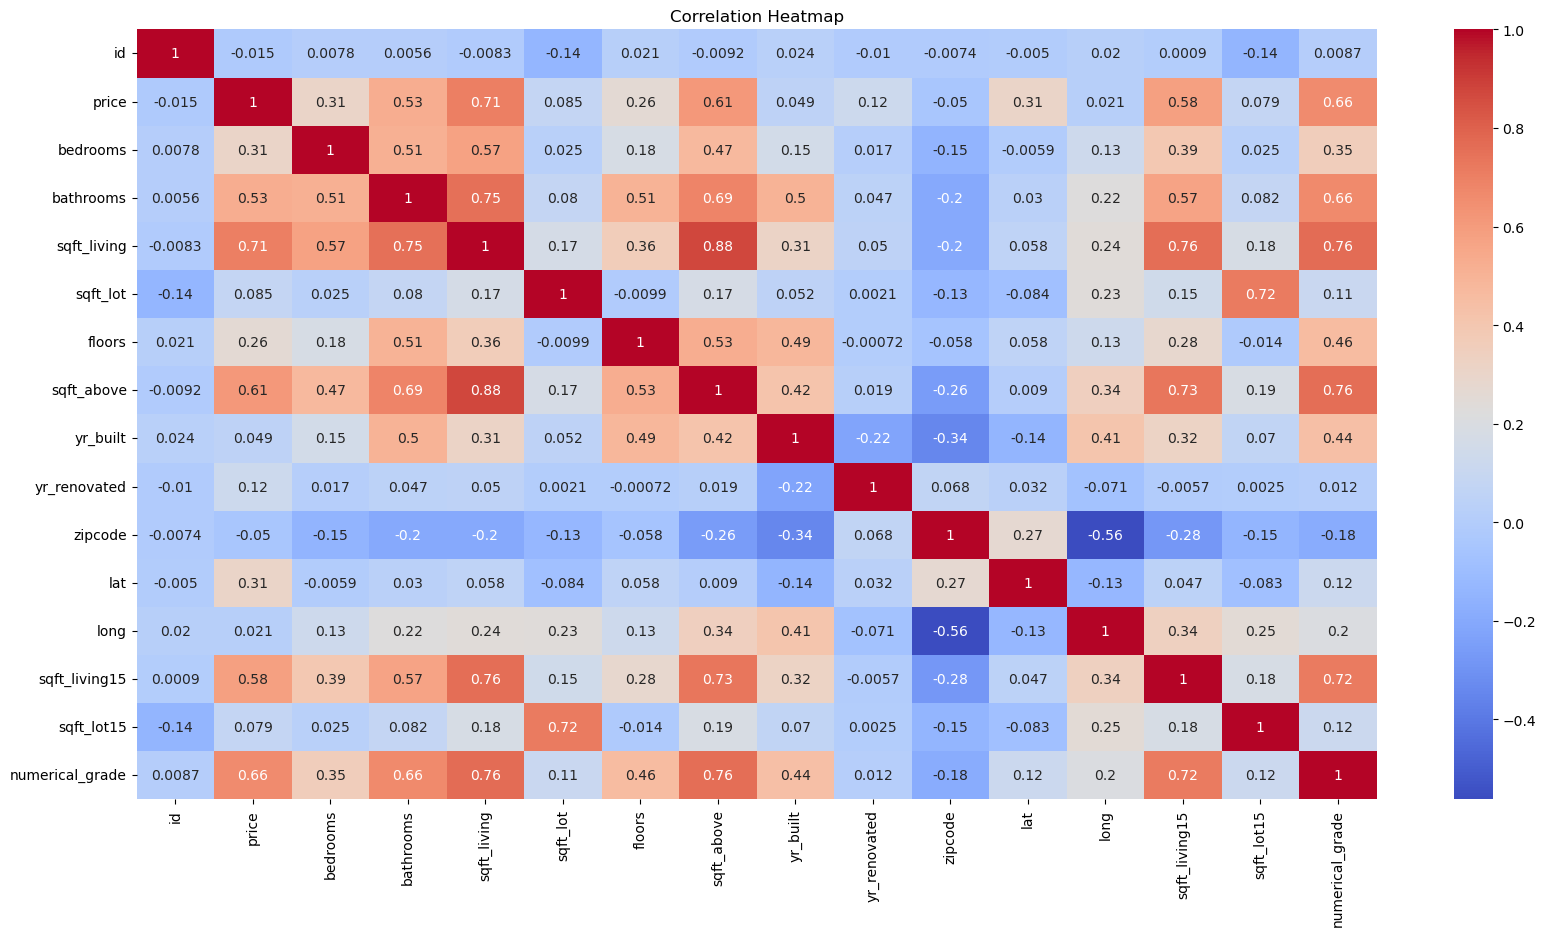

In [31]:
# Correlation graph 
plt.figure(figsize=(20,10))
corr_matrix = df[['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'numerical_grade', 'rating']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.show()

* Our **Multivariate** analysis evaluates the correlation of multiple variables.The heatmap above displays the correlation of all the columns in our data frame

#### Modelling
###### Model 1

#### Simple linear regression

For our baseline model we chose square foot living as the predictor variable because it has the highst correlation at 0.71.

In [32]:
y = df_subset["price"]
X_baseline = df_subset[["sqft_living"]]

In [33]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     8835.
Date:                Thu, 01 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:17:58   Log-Likelihood:            -2.0230e+05
No. Observations:               14909   AIC:                         4.046e+05
Df Residuals:                   14907   BIC:                         4.046e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         9.71e+04   4452.150     21.810      

* The model is statistically significant overall, with an F-statistic p-value well below 0.05
* R-squared value is 0.372, indicating that approximately 37.2% of the variance in the price can be explained by the sqft_living variable
* The model coefficients (price and sqft_living) are both statistically significant, with t-statistic p-values well below 0.05
* The coefficient for "const" is 9.71e+04, and the coefficient for "sqft_living" is 199.9715. These values indicate that, on average, for each additional square foot of living space, the predicted price increases by approximately 199.9715 units.

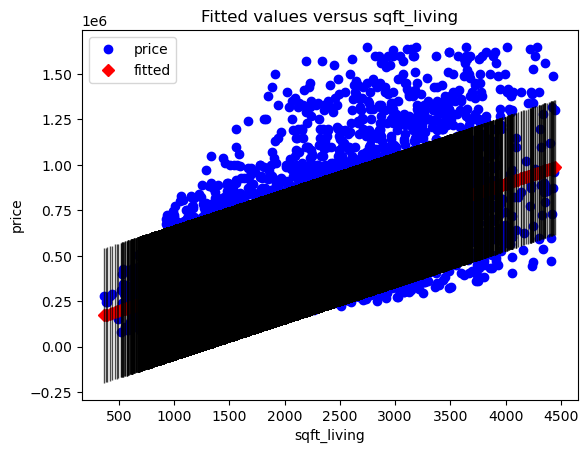

In [34]:
#Plotting the fit of the baseline model on the "sqft_living" feature
sm.graphics.plot_fit(baseline_results, "sqft_living")
plt.show()

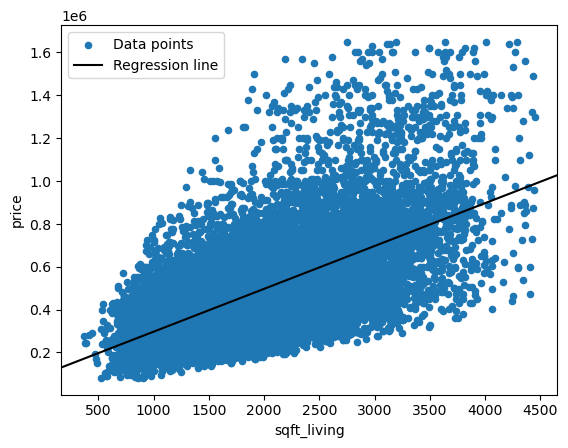

In [35]:
# Line of best fit
fig, ax = plt.subplots()
df_subset.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="black")
ax.legend();

Text(0, 0.5, 'residuals')

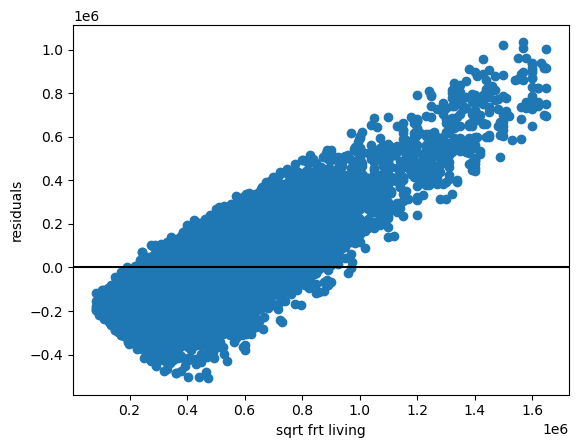

In [36]:
# Checking for residuals
fig, ax = plt.subplots()
ax.scatter(df_subset["price"], baseline_results.resid)
ax.axhline(y=0,color = "black")
ax.set_xlabel("sqrt frt living")
ax.set_ylabel("residuals")

In [37]:
resids_1= baseline_results.resid

<Figure size 400x400 with 0 Axes>

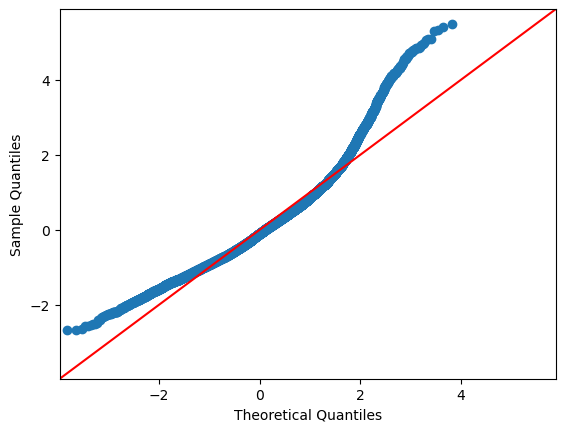

In [38]:
# a QQ plot to see if an S curve, therefore forms normal distribution
plt.figure(figsize=(4,4))
fig = sm.graphics.qqplot(resids_1, dist=stats.norm, line='45', fit=True)
fig.show()

Our model showed right skeweness which means there are extreme values that impact the significance of the model

###  Multilinear Regression

######  MODEL 2

Data Preprocessing before modelling

## Onehot encoding

In [39]:
#Onehotencoding to change waterfront to a numeric value
waterfront = df_subset[['waterfront']]
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
ohe.fit(waterfront)
waterfront_enc = ohe.transform(waterfront)
waterfront_enc = pd.DataFrame(waterfront_enc,
                             columns=['waterfront_NO','waterfront_YES'],
                             index=df_subset.index)
df_subset.drop('waterfront', axis=1, inplace=True)
df_subset= pd.concat([df_subset, waterfront_enc], axis=1)

This code performs one-hot encoding on the 'waterfront' column. One-hot encoding is a process of converting categorical variables into a binary representation suitable for machine learning algorithms.

In [40]:
#checking for the columns
df_subset.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above',
       'sqft_living15', 'numerical_grade', 'rating', 'floors', 'zipcode',
       'year', 'waterfront_NO', 'waterfront_YES'],
      dtype='object')

In [41]:
# PREPARATION OF BATHROOMS COLUMNS
df_subset =df_subset[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above',
       'sqft_living15', 'numerical_grade', 'floors', 'zipcode',
       'year', 'waterfront_NO', 'waterfront_YES']]  # Keep selected columns

df_subset.loc[df_subset['bathrooms'] <= 1, 'bathrooms'] = 1
df_subset.loc[(df_subset['bathrooms'] > 1) & (df_subset['bathrooms'] <= 2), 'bathrooms'] = 2
df_subset.loc[(df_subset['bathrooms'] > 2) & (df_subset['bathrooms'] <= 3), 'bathrooms'] = 3
df_subset.loc[(df_subset['bathrooms'] > 3) & (df_subset['bathrooms'] <= 4), 'bathrooms'] = 4
df_subset.loc[(df_subset['bathrooms'] > 4) & (df_subset['bathrooms'] <= 5), 'bathrooms'] = 5
df_subset.loc[(df_subset['bathrooms'] > 5) & (df_subset['bathrooms'] <= 6), 'bathrooms'] = 6
df_subset.loc[(df_subset['bathrooms'] > 6) & (df_subset['bathrooms'] <= 7), 'bathrooms'] = 7
df_subset.loc[(df_subset['bathrooms'] > 7) & (df_subset['bathrooms'] <= 8), 'bathrooms'] = 8

In [42]:
# CHANGING 'BATHROOMS' TO INT64
df_subset['bathrooms'] = df_subset['bathrooms'].astype('Int64')
df_subset["floors"] = df_subset["floors"].round().astype(int)
# ADDING DUMMIES FOR "GRADE", "BEDROOMS" AND "BATHROOMS" 

In [43]:
#creating dummies for our categorical and continuous  data features
df_dummies = pd.get_dummies(df_subset, columns=['bedrooms', 'bathrooms', 'numerical_grade','year','floors','zipcode'])
df_dummies.columns = [column.replace('.0', '') if column.endswith('.0') else column for column in df_dummies.columns]

In [44]:
# checking for the new columns created
df_dummies.columns

Index(['price', 'sqft_living', 'sqft_above', 'sqft_living15', 'waterfront_NO',
       'waterfront_YES', 'bedrooms_1', 'bedrooms_2', 'bedrooms_3',
       'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bathrooms_1', 'bathrooms_2',
       'bathrooms_3', 'bathrooms_4', 'bathrooms_5', 'numerical_grade_5',
       'numerical_grade_6', 'numerical_grade_7', 'numerical_grade_8',
       'numerical_grade_9', 'numerical_grade_10', 'year_2014', 'year_2015',
       'floors_1', 'floors_2', 'floors_3', 'zipcode_98001', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipc

In [45]:
df_dummies.head()

,price,sqft_living,sqft_above,sqft_living15,waterfront_NO,waterfront_YES,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,538000,2570,2170,1690,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,604000,1960,1050,1360,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,510000,1680,1680,1800,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,257500,1715,1715,2238,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,229500,1780,1050,1780,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


Let's now proceed to loading our data in the new model

In [46]:
y = 'price'
X_1 = df_dummies[['sqft_living', 'sqft_above', 'sqft_living15', 'waterfront_NO',
       'waterfront_YES', 'bedrooms_1', 'bedrooms_2', 'bedrooms_3',
       'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bathrooms_1', 'bathrooms_2',
       'bathrooms_3', 'bathrooms_4', 'bathrooms_5', 'numerical_grade_5',
       'numerical_grade_6', 'numerical_grade_7', 'numerical_grade_8',
       'numerical_grade_9', 'numerical_grade_10', 'year_2014', 'year_2015',
       'floors_1', 'floors_2', 'floors_3', 'zipcode_98001', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
       'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 'zipcode_98133',
       'zipcode_98136', 'zipcode_98144', 'zipcode_98146', 'zipcode_98148',
       'zipcode_98155', 'zipcode_98166', 'zipcode_98168', 'zipcode_98177',
       'zipcode_98178', 'zipcode_98188', 'zipcode_98198', 'zipcode_98199']]
all_columns = '+'.join(X_1.columns)
multi_formula_1 = y + '~' + all_columns

In [47]:
model_1 = ols(formula=multi_formula_1, data=df_dummies).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     692.2
Date:                Thu, 01 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:18:00   Log-Likelihood:            -1.9348e+05
No. Observations:               14909   AIC:                         3.871e+05
Df Residuals:                   14818   BIC:                         3.878e+05
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.441e+05   3752

#####  Interpretation
+ R-squared: The R-squared value of 0.808 indicates that approximately 80.8% of the variance in the dependent variable (price) can be explained by the independent variables included in the model.

+  Model significance: The F-statistic of  692.2 with a probability (p-value) of 0.00 suggests that the overall model is statistically significant, meaning that at least one of the independent variables has a significant effect on the dependent variable.

+ The coefficient represents the estimated effect of the features on the price. 
+ The independent variables are represented by different features, such as "sqft_living," "waterfront," "bedrooms," "bathrooms," "numerical_grade," "year," "floors," and "zipcode." Each feature has multiple categories, and the coefficients represent the estimated effect of each category compared to a reference category for example the coefficient for "sqft_living" is 112.0845, indicating that, on average, a one-unit increase in the square footage of living space is associated with an increase of approximately $112,084.50 in the predicted price, holding other variables constant.
+ The intercept coefficient is 1.441e+05  (144,100), indicating the estimated price when all other independent variables are zero.

In [48]:
# get MAE to see how much error is in our model
y_predic = model_1.resid
y = np.log(df_dummies['price'])
mae_resid_2 = np.mean(np.abs(y - y_predic))
mae_resid_2

73009.69773191935

* The absolute difference between the predicted values and the actual values is 78325.75392200101. It indicates that the model's predictions have a larger average deviation from the actual values.


In [49]:
# the difference between the actual target values and the predicted target 
resids_2 = model_1.resid
resids_2 

0         -3,354.40
1         84,989.25
2         24,123.27
4         11,861.67
5       -146,179.72
            ...    
15757    -66,639.20
15758   -165,029.15
15759    -72,552.66
15760     24,181.89
15761    -52,919.11
Length: 14909, dtype: float64

* In regression analysis, the residuals represent the differences between the observed values and the predicted values of the dependent variable.

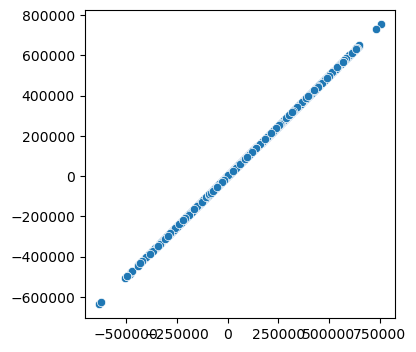

In [50]:
# check residuals for linearity
plt.figure(figsize=(4,4))
sns.scatterplot(y=y_predic,x=resids_2 );

* If the residuals form a straight line with no distinct pattern or curvature, it indicates that the model is performing well and making unbiased predictions.
* This  suggests that the model is capturing the underlying relationship between the independent and dependent variables accurately.

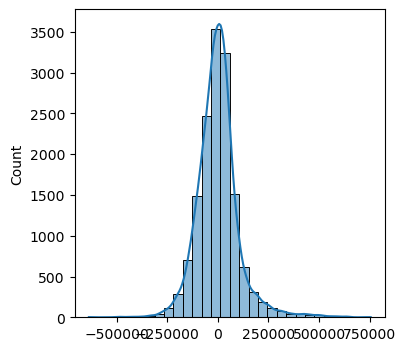

In [51]:
# and normality of residuals
plt.figure(figsize=(4,4))
sns.histplot(data=resids_2,bins=30, kde=True);

This pattern suggests that, on average, the model predictions are unbiased and do not display any systematic or significant deviation from the true values. In other words, the errors are equally likely to be positive or negative, and they tend to cluster around zero.

<Figure size 400x400 with 0 Axes>

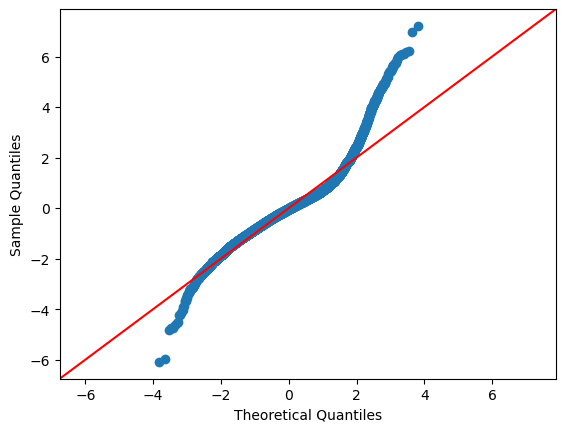

In [52]:
# a QQ plot to see if an S curve, therefore forms normal distribution
plt.figure(figsize=(4,4))
fig = sm.graphics.qqplot(resids_2, dist=stats.norm, line='45', fit=True)
fig.show()

Our model has improved but still shows right skeweness.

Text(0, 0.5, 'residuals')

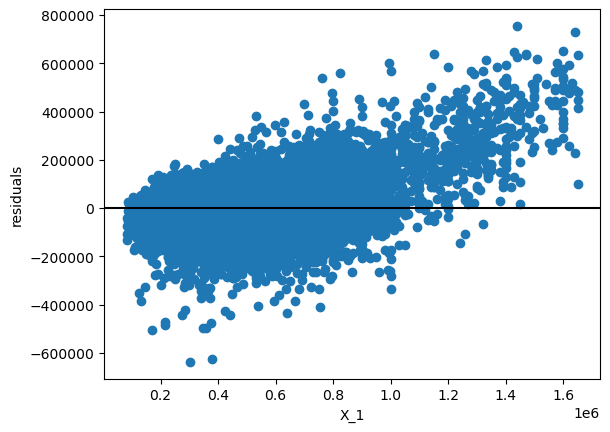

In [53]:
# Checking for residuals to show homoscedasticity
model_1 = sm.OLS(y, X_1)

# Obtain the model results
results = model_1.fit()

# Calculate the residuals
residuals = results.resid
fig, ax = plt.subplots()
ax.scatter(df_dummies["price"], resids_2)
ax.axhline(y=0,color = "black")
ax.set_xlabel("X_1")
ax.set_ylabel("residuals")

This model is still skewed and the residuals are not evenly spread along the x-axis this warrants for an improvement of the model.

To attempt to correct this and further improve the model we will do data log transformation in the next model.

## MODEL 3

#### Data Log Transformation

In [54]:
# Log transformation and creation of a new dataframe 
columns_to_transform = ['price', 'sqft_living', 'sqft_living15', 'sqft_above']
transformed_data = df_dummies.copy()

transformed_data[columns_to_transform] = np.log(transformed_data[columns_to_transform])
transformed_data.head()

,price,sqft_living,sqft_above,sqft_living15,waterfront_NO,waterfront_YES,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,13.20,7.85,7.68,7.43,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,13.31,7.58,6.96,7.22,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,13.14,7.43,7.43,7.50,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,12.46,7.45,7.45,7.71,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,12.34,7.48,6.96,7.48,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


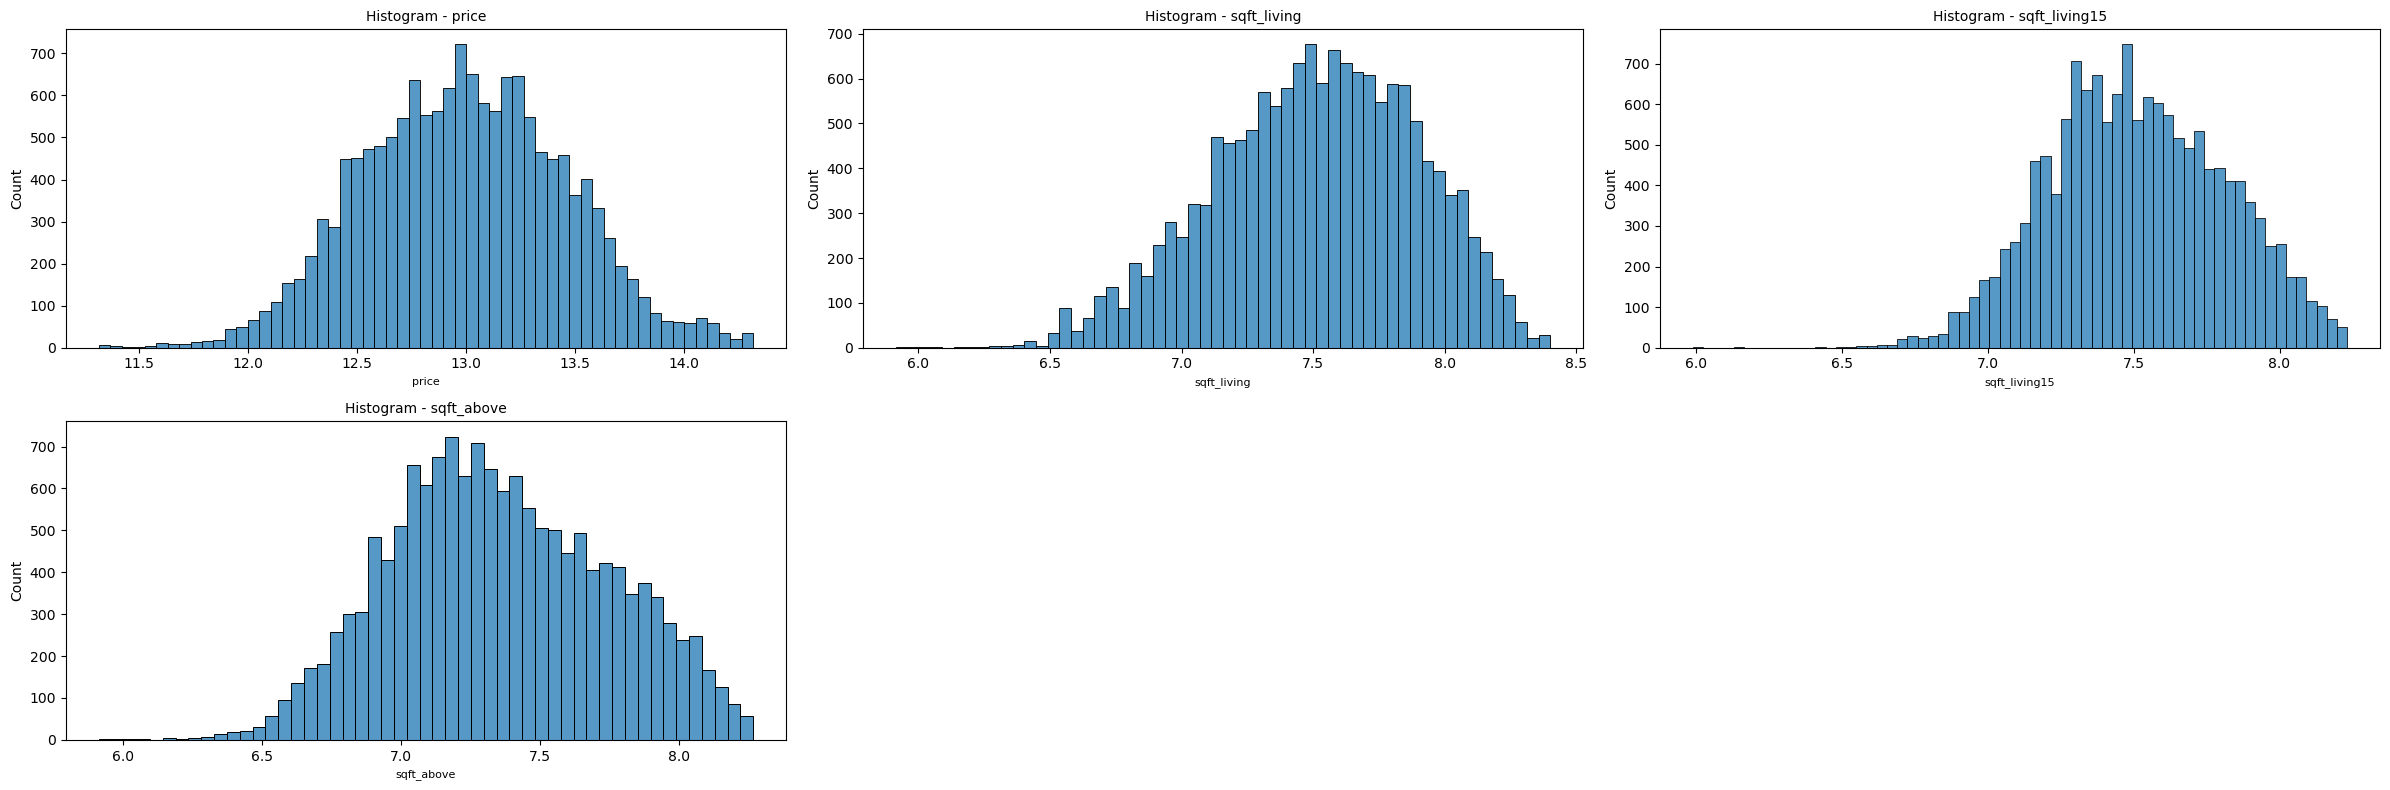

In [55]:
#Checking for the frequencies of the dataset
# Define the columns for histograms
columns = ['price', 'sqft_living', 'sqft_living15', 'sqft_above']

# Calculate the number of rows and columns for the subplot grid
n_cols = 3
n_rows = (len(columns) - 1) // n_cols + 1

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(24, 4*n_rows))

# Flatten the axes array
axes = axes.flatten()

# Generate histograms for each column
for i, column in enumerate(columns):
    sns.histplot(data=transformed_data[column], ax=axes[i])
    axes[i].set_title(f'Histogram - {column}', fontsize=10)
    axes[i].set_xlabel(column, fontsize=8)

# Remove any unused subplots
for j in range(len(columns), n_rows * n_cols):
    fig.delaxes(axes[j])

# Adjust the layout and spacing
plt.tight_layout()

# Display the plots
plt.show()

In [56]:
transformed_data.columns

Index(['price', 'sqft_living', 'sqft_above', 'sqft_living15', 'waterfront_NO',
       'waterfront_YES', 'bedrooms_1', 'bedrooms_2', 'bedrooms_3',
       'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bathrooms_1', 'bathrooms_2',
       'bathrooms_3', 'bathrooms_4', 'bathrooms_5', 'numerical_grade_5',
       'numerical_grade_6', 'numerical_grade_7', 'numerical_grade_8',
       'numerical_grade_9', 'numerical_grade_10', 'year_2014', 'year_2015',
       'floors_1', 'floors_2', 'floors_3', 'zipcode_98001', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipc

In [57]:
y = 'price'
X_2 = transformed_data[['sqft_living', 'sqft_above', 'sqft_living15', 'waterfront_NO',
       'waterfront_YES', 'bedrooms_1', 'bedrooms_2', 'bedrooms_3',
       'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bathrooms_1', 'bathrooms_2',
       'bathrooms_3', 'bathrooms_4', 'bathrooms_5', 'numerical_grade_5',
       'numerical_grade_6', 'numerical_grade_7', 'numerical_grade_8',
       'numerical_grade_9', 'numerical_grade_10', 'year_2014', 'year_2015',
       'floors_1', 'floors_2', 'floors_3', 'zipcode_98001', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
       'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 'zipcode_98133',
       'zipcode_98136', 'zipcode_98144', 'zipcode_98146', 'zipcode_98148',
       'zipcode_98155', 'zipcode_98166', 'zipcode_98168', 'zipcode_98177',
       'zipcode_98178', 'zipcode_98188', 'zipcode_98198', 'zipcode_98199']]
all_columns = '+'.join(X_2.columns)
multi_formula_2 = y + '~' + all_columns

In [58]:
model_2 = ols(formula=multi_formula_2, data=transformed_data).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     881.6
Date:                Thu, 01 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:18:02   Log-Likelihood:                 4074.5
No. Observations:               14909   AIC:                            -7967.
Df Residuals:                   14818   BIC:                            -7275.
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.8426      0

#####  Interpretation
1. The R-squared value is 0.843, indicating that approximately 84.3% of the variation in the price can be explained by the independent variables included in the model.
2. The F-statistic is 881.6, and the p-value is 0.00 which indicates that the model is statistically significant.
3. The coefficient represents the estimated effect of the features on the price. For example, the coefficient of "sqft_living" is 0.3747, suggesting that a one-unit increase in the square footage of living space is associated with a 0.3747 increase in the predicted price, holding other variables constant.
4. The Mean Absolute Error between the predicted values and the actual values is 2.56458455201137,indicating that, on average, the model's predictions deviate by approximately 2.56 from the actual values.
5. The residuals consistently remain close to zero.

In [59]:
# get MAE to see how much error is in our model
y_predic = model_2.resid
y = np.log(transformed_data['price'])
mae_resid_2 = np.mean(np.abs(y - y_predic))
mae_resid_2

2.5637814367187057

In [60]:
# the difference between the actual target values and the predicted target 
resids_3 = model_2.resid

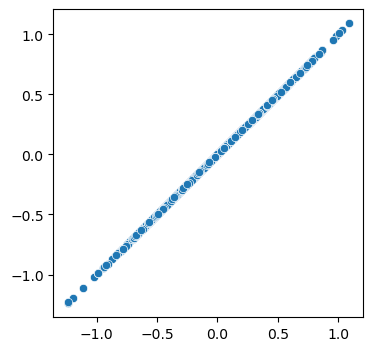

In [61]:
# check residuals for linearity
plt.figure(figsize=(4,4))
sns.scatterplot(y=y_predic,x=resids_3 );

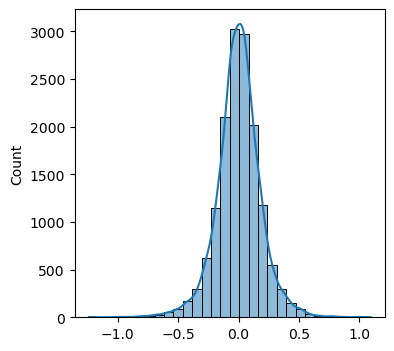

In [62]:
# and normality of residuals
plt.figure(figsize=(4,4))
sns.histplot(data=resids_3,bins=30, kde=True);

 This pattern suggests that, on average, the model predictions are unbiased and do not display any systematic or significant deviation from the true values. In other words, the errors are equally likely to be positive or negative, and they tend to cluster around zero.

<Figure size 400x400 with 0 Axes>

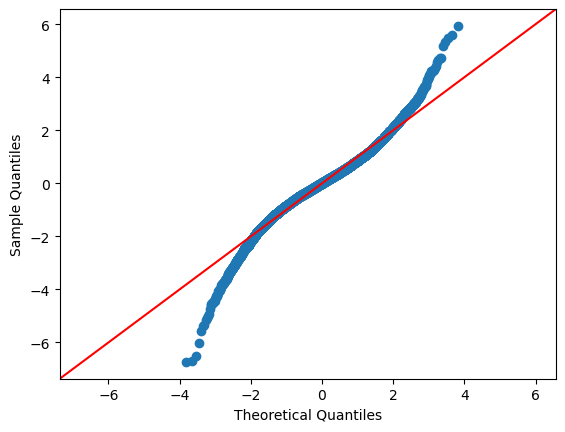

In [63]:
# a QQ plot to see if an S curve, therefore forms normal distribution
plt.figure(figsize=(4,4))
fig = sm.graphics.qqplot(resids_3, dist=stats.norm, line='45', fit=True)
fig.show()

Text(0, 0.5, 'residuals')

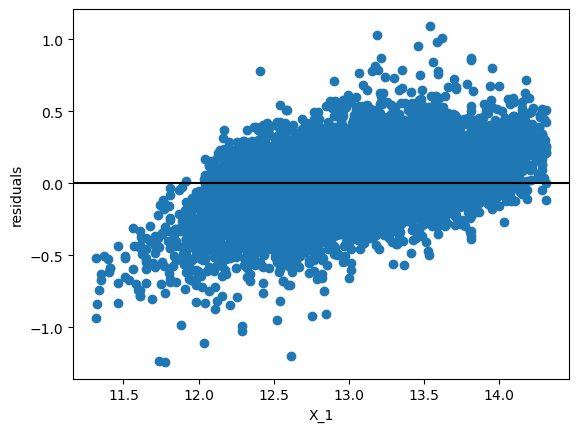

In [64]:
# Checking for residuals
model_2 = sm.OLS(y, X_1)

# Obtain the model results
results = model_2.fit()

# Calculate the residuals
residuals = results.resid
fig, ax = plt.subplots()
ax.scatter(transformed_data["price"], resids_3)
ax.axhline(y=0,color = "black")
ax.set_xlabel("X_1")
ax.set_ylabel("residuals")

To further improve the model we will:
1. Drop independent variables that are not statistically significant (['zipcode_98155','zipcode_98077','zipcode_98024','zipcode_98011')

2. Drop predictors that are highly corelated to others eg. 'sqft_above'& 'sqft_living15' for example : ('sqft_above' vs + 

3. Drop predictors that are highly corelated to others eg. 'sqft_above'& 'sqft_living15' for example : ('sqft_above' vs sqft_living is 0.88...et)

####  Model 4

In [65]:
#Dropping colums that are not statistically significant
#Dropping columns that are highly correlated
transformed_data.drop(['zipcode_98155','zipcode_98077','zipcode_98024','zipcode_98011','sqft_above','sqft_living15'],axis=1,inplace=True)

In [66]:
transformed_data.head()

,price,sqft_living,waterfront_NO,waterfront_YES,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,...,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,13.20,7.85,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13.31,7.58,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13.14,7.43,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12.46,7.45,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,12.34,7.48,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [67]:
#cheking for the correlation of the features
correlation_table = transformed_data[['price','sqft_living','waterfront_NO',
       'waterfront_YES', 'bedrooms_1', 'bedrooms_2', 'bedrooms_3',
       'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bathrooms_1', 'bathrooms_2',
       'bathrooms_3', 'bathrooms_4', 'bathrooms_5', 'numerical_grade_5',
       'numerical_grade_6', 'numerical_grade_7', 'numerical_grade_8',
       'numerical_grade_9', 'numerical_grade_10', 'year_2014', 'year_2015',
       'floors_1', 'floors_2', 'floors_3', 'zipcode_98001', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_98092', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
       'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 'zipcode_98133',
       'zipcode_98136', 'zipcode_98144', 'zipcode_98146', 'zipcode_98148',
       'zipcode_98166', 'zipcode_98168', 'zipcode_98177',
       'zipcode_98178', 'zipcode_98188', 'zipcode_98198', 'zipcode_98199']].corr()
correlation_table

,price,sqft_living,waterfront_NO,waterfront_YES,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,...,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
price,1,0.60,-0.09,0.09,-0.08,-0.16,-0.16,0.22,0.14,0.06,...,0.03,-0.09,-0.06,-0.02,-0.15,0.06,-0.11,-0.09,-0.12,0.11
sqft_living,0.60,1,-0.01,0.01,-0.19,-0.45,-0.19,0.41,0.25,0.11,...,-0.04,-0.06,-0.02,0.00,-0.08,0.03,-0.05,-0.02,-0.04,0.01
waterfront_NO,-0.09,-0.01,1,-1.00,-0.04,-0.04,0.01,0.02,0.01,-0.00,...,0.01,-0.04,0.00,-0.06,0.01,-0.00,-0.06,0.01,-0.05,0.01
waterfront_YES,0.09,0.01,-1.00,1,0.04,0.04,-0.01,-0.02,-0.01,0.00,...,-0.01,0.04,-0.00,0.06,-0.01,0.00,0.06,-0.01,0.05,-0.01
bedrooms_1,-0.08,-0.19,-0.04,0.04,1,-0.04,-0.09,-0.06,-0.03,-0.01,...,0.02,0.01,-0.01,0.00,0.01,-0.00,0.00,-0.01,0.02,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zipcode_98177,0.06,0.03,-0.00,0.00,-0.00,-0.01,0.01,-0.00,-0.00,0.01,...,-0.01,-0.01,-0.01,-0.01,-0.01,1,-0.01,-0.01,-0.01,-0.01
zipcode_98178,-0.11,-0.05,-0.06,0.06,0.00,0.02,-0.02,-0.00,0.02,0.00,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,1,-0.01,-0.01,-0.01
zipcode_98188,-0.09,-0.02,0.01,-0.01,-0.01,-0.00,-0.01,0.00,0.01,0.02,...,-0.01,-0.01,-0.00,-0.01,-0.01,-0.01,-0.01,1,-0.01,-0.01
zipcode_98198,-0.12,-0.04,-0.05,0.05,0.02,0.01,0.01,-0.01,-0.01,-0.01,...,-0.02,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,1,-0.01


In [68]:
y = 'price'
X_3 = transformed_data[['sqft_living','waterfront_NO',
       'waterfront_YES', 'bedrooms_1', 'bedrooms_2', 'bedrooms_3',
       'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bathrooms_1', 'bathrooms_2',
       'bathrooms_3', 'bathrooms_4', 'bathrooms_5', 'numerical_grade_5',
       'numerical_grade_6', 'numerical_grade_7', 'numerical_grade_8',
       'numerical_grade_9', 'numerical_grade_10', 'year_2014', 'year_2015',
       'floors_1', 'floors_2', 'floors_3', 'zipcode_98001', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_98092', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
       'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 'zipcode_98133',
       'zipcode_98136', 'zipcode_98144', 'zipcode_98146', 'zipcode_98148',
       'zipcode_98166', 'zipcode_98168', 'zipcode_98177',
       'zipcode_98178', 'zipcode_98188', 'zipcode_98198', 'zipcode_98199']]
all_columns = '+'.join(X_3.columns)
multi_formula_3 = y + '~' + all_columns

In [69]:
model_3 = ols(formula=multi_formula_3, data=transformed_data).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     880.6
Date:                Thu, 01 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:18:03   Log-Likelihood:                 3708.5
No. Observations:               14909   AIC:                            -7245.
Df Residuals:                   14823   BIC:                            -6591.
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.2605      0

#####  Interpretation
1. The R-squared value of 0.835 on our last model means that approximately 83.5% of the variation in the price can be explained by the independent variables. There is a slight drop from our previous model because we dropped parameters that  were not statistically significant.
2. The F-statistic is 880.6, and the p-value is 0.00 which indicates that the model is statistically significant.
3. The coefficient represents the estimated effect of the features on the price. For example the coefficient  for "sqft_living" is 0.5261 , indicating that a one-unit increase in square footage of living space is associated with an estimated increase of 0.5261  in the price, holding other variables constant.


In [70]:
# get MAE to see how much error is in our model
y_predic = model_3.resid
y = np.log(transformed_data['price'])
mae_resid_3 = np.mean(np.abs(y - y_predic))
mae_resid_3

2.563781436718725

 The absolute difference between the predicted values and the actual values is 2.5637814367187293.

In [76]:
# Assuming y contains the actual target values
y = transformed_data['price']

# Fit the multiple linear regression model
model_3 = sm.OLS(y, sm.add_constant(X_3)).fit()

# Get the predicted values
y_pred = model_3.predict(sm.add_constant(X_3))

# Calculate RMSE
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

# Calculate MAE
mae = mean_absolute_error(y, y_pred)

# Print RMSE and MAE
print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 0.18868391892566125
MAE: 0.13885718950076417


In [71]:
# the difference between the actual target values and the predicted target 
resids_4 = model_3.resid

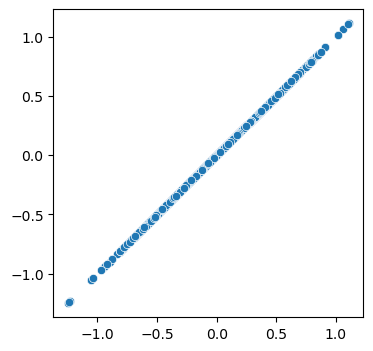

In [72]:
# check residuals for linearity
plt.figure(figsize=(4,4))
sns.scatterplot(y=y_predic,x=resids_4 );

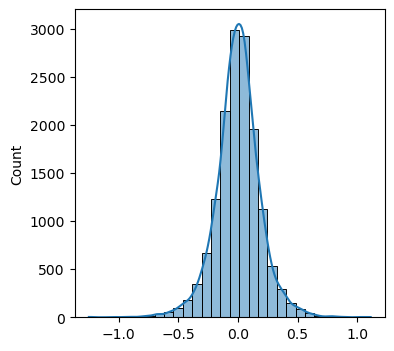

In [73]:
# and normality of residuals
plt.figure(figsize=(4,4))
sns.histplot(data=resids_4,bins=30, kde=True);

Text(0, 0.5, 'residuals')

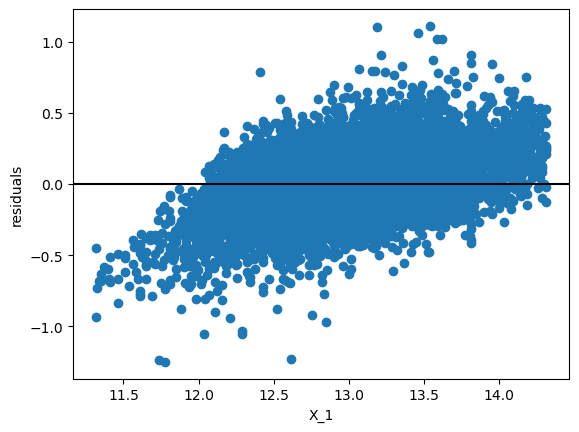

In [74]:
# Checking for residuals/homescendascity
model_3 = sm.OLS(y, X_1)

# Obtain the model results
results = model_3.fit()

# Calculate the residuals
residuals = results.resid
fig, ax = plt.subplots()
ax.scatter(transformed_data["price"], resids_4)
ax.axhline(y=0,color = "black")
ax.set_xlabel("X_1")
ax.set_ylabel("residuals")

Residuals consistently remain close to zero

<Figure size 400x400 with 0 Axes>

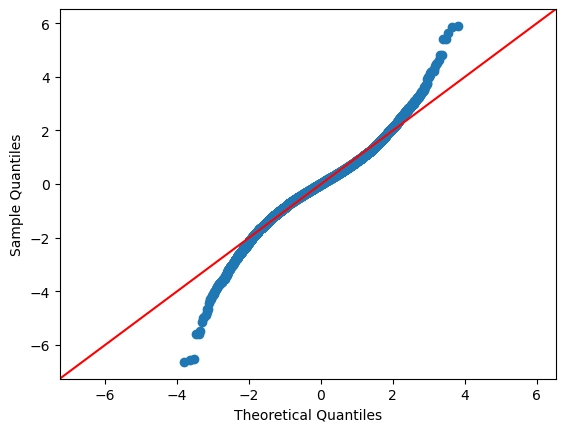

In [75]:
# a QQ plot to see if an S curve, therefore forms normal distribution
plt.figure(figsize=(4,4))
fig = sm.graphics.qqplot(resids_4, dist=stats.norm, line='45', fit=True)
fig.show()

After running several models, the above is the model with the highest R2 value, and the best fit of residuals to a normal distribution. 

####  Conclusion
Based on the OLS regression results, the multiple linear regression model developed to identify key factors influencing house prices in the northwestern county has an adjusted R-squared value of 0.8350, indicating that 84% of the variation in house prices can be explained by the selected features. The F-statistic of 880.6 with a corresponding p-value of 0.00 suggests that the overall model is statistically significant.

Several features have a significant influence on house prices in the area. The square footage of the living area (sqft_living), whether the property has a waterfront view (waterfront), the number of bedrooms and bathrooms, the grade of the property(which is basically its design), the year of sale, and various zip codes are among the significant factors affecting house prices.

The developed model can be used to determine optimal pricing strategies for the agency, as it provides coefficients for each feature. By considering these coefficients and the corresponding features of a property, the agency can estimate its price more accurately. Furthermore, by comparing predicted prices with actual prices, the agency can identify overpriced or underpriced houses and make necessary adjustments to maximize sales potential.

The analytical insights and pricing strategy developed through this project can significantly contribute to improving the agency's annual revenue. By leveraging the model's findings and implementing the recommended pricing strategies, the agency can enhance its decision-making process, attract potential buyers, and increase the number of homes sold.

In conclusion, the research successfully achieved its objectives by identifying key features influencing house prices, developing an optimal pricing strategy through multiple linear regression, identifying overpriced or underpriced houses, and providing insights to enhance the agency's annual revenue. By implementing the findings of this research, the XYZ real estate agency can make informed pricing decisions, resulting in increased sales and improved overall performance in the northwestern county housing market.

#### Recommendation

Based on the analysis conducted and the results obtained from the multiple linear regression model, the following recommendations can be made to XYZ real estate agency:

Focus on key features: The analysis reveals that several key features significantly influence house prices in the northwestern county. These features include square footage of living space, waterfront location, number of bedrooms and bathrooms, property grade, year of construction, and specific zip codes. It is recommended that the agency pays close attention to these factors when determining the pricing of houses.

Optimize pricing strategy: Utilize the developed robust multiple linear regression model to create an optimal pricing strategy. The coefficients obtained from the model provide insights into the impact of each feature on house prices. By considering these coefficients and incorporating market trends, XYZ real estate agency can set competitive and attractive prices for their listed properties. This approach will help maximize the chances of selling homes at desirable price points.

Identify overpriced and underpriced houses: By comparing predicted prices from the model with actual prices of houses, the agency can identify overpriced or underpriced properties in their inventory. This information can guide them in adjusting the prices accordingly to improve sales and ensure competitive pricing in the market.

Leverage analytical insights: The analytical insights derived from this research project can significantly contribute to improving the agency's annual revenue. By incorporating the findings into their decision-making processes, XYZ real estate agency can gain a competitive advantage, attract more buyers, and increase their overall sales volume. It is crucial to regularly update and refine the model as new data becomes available to maintain its accuracy and relevance.

In conclusion, by implementing the recommendations mentioned above and utilizing the developed multiple linear regression model, XYZ real estate agency can enhance their pricing strategy, identify lucrative opportunities, and ultimately increase their annual sales. The insights obtained from this research provide a solid foundation for making data-driven decisions and gaining a competitive edge in the real estate market.

####  Next Steps
1. Incorporate temporal dynamics: Consider incorporating temporal dynamics by analyzing how the housing market changes over time. Explore time series analysis techniques to capture seasonal trends, price fluctuations, or long-term market trends. This can help provide a more accurate representation of house price dynamics.
2. Collaborate with domain experts: Engage in discussions and collaborations with real estate experts or domain specialists to gain deeper insights into the market and the factors that influence house prices. Their expertise can provide valuable guidance and help validate the analysis conducted.
3. Refine the model: While the multiple linear regression model provided valuable insights, we could explore other regression techniques to improve the accuracy and predictive power of the model such as handling multicollinearity and over fitting and under under fitting.
4. Stay updated and iterate: Keep track of new data and industry trends to ensure that the model remains up-to-date and relevant. Regularly iterate and refine the analysis as new data becomes available or market dynamics change.
